## CURSO APRENDIZAJE AUTOMATICO AVANZADO.
### Tarea 1: Ingenieria de  carácteristicas

##### Integrantes:
* Ana María Urán González.
* Karen Lizeth Velásquez  Moná.

## Carga de base de datos

Importamos las  librerias necesarias  para  realizar el proceso de ingenieria de  caracteristicas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from scipy.misc import factorial
from scipy.special import factorial
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
Medellin=pd.read_csv('C:/Users/Acer/Downloads/Ana_base4.csv',sep=';',encoding = 'UTF-8') #Carga datos
Medellin.describe(include='all')

C:\Users\Acer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hurto,Codigo_Stage_Hurto,Caso_Hurto,Ano,Dia,Dia_nombre,Mes_Calendario,Hora_Hurto,Minuto_Hurto,Jornada,...,Modelo_Hurto,Estado_Civil,Medio_Transporte,Medio_Transporte_Agresor,Sede_Receptora,Grupo_Sede_Receptora,Marca,Color,Arma_Medio,Fecha_Actualización_Hurto
count,6.348200e+04,63482,63482.000000,63482.000000,63482,63482,63482,63482.000000,63482.000000,63482,...,63482.000000,63482,63482,63482,63482,63482,63482,63482,63482,63482
unique,NaN,63482,NaN,NaN,383,7,12,NaN,NaN,4,...,NaN,6,10,10,19,1,180,16,8,2
top,NaN,e2c11716f5de0cc03242d3f6241e94b92f7b1b27,NaN,NaN,6/08/2019,Viernes,Enero,NaN,NaN,Noche,...,NaN,Soltero(a),Caminata,Caminata,Candelaria,Estación,Sin dato,Sin dato,No,8/01/2020
freq,NaN,1,NaN,NaN,381,10806,7027,NaN,NaN,17774,...,NaN,36762,49743,45152,17096,63482,37419,43866,30283,60579
mean,3.698437e+06,NaN,0.642025,2019.045729,NaN,NaN,NaN,12.127327,17.142324,NaN,...,77.483617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.885707e+04,NaN,0.479409,0.208899,NaN,NaN,NaN,6.619599,16.715080,NaN,...,389.334602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.666401e+06,NaN,0.000000,2019.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.682271e+06,NaN,0.000000,2019.000000,NaN,NaN,NaN,7.000000,0.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.698142e+06,NaN,1.000000,2019.000000,NaN,NaN,NaN,12.000000,19.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.714013e+06,NaN,1.000000,2019.000000,NaN,NaN,NaN,18.000000,30.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de datos
La base  original  contiene  63482  observaciones  correspondientes a los diferentes  tipos de  hurtos denunciados en Medellín  durante 2019  y los 2 primeros  meses del año 2020.La base cuenta originalmente con  41 variables  de las  cuales  el 95% son categóricas

Como primer  paso en este proceso es necesario  limpiar la  base  de  datos de  registros  faltantes, columnas  inútiles  y datos  atípicos. Iniciamos  esta parte del proceso definiendo  temporalmente  los  casos de análisis (2019), Adicionalmente, un mismo  caso de hurto puede  ser  reportado  varias  veces, por lo cual para depurar  las  denuncias  duplicadas  solo tomaremos la  variable  Caso_Hurto=1, el cual conserva solo la primera  denuncia  hecha por cada caso.
Es necesario eliminar  algunas  variables  que  hasta este  lugar  se detectan como inútiles para la elaboración de  cualquier análisis debido a su poco aporte de  información

In [3]:
Medellin2019=Medellin[(Medellin['Ano'] == 2019) & (Medellin['Caso_Hurto']==1)].drop(['Hurto',
            'Codigo_Stage_Hurto','Caso_Hurto','Ano','Minuto_Hurto','Nombre_Bien_Sijin_Hurto',
            'Conducta_Especial','Responsable_Indicador','Modelo_Hurto','Medio_Transporte',
            'Grupo_Sede_Receptora','Marca','Color','Fecha_Actualización_Hurto'], axis=1)
Medellin2019.describe(include='all')

,Dia,Dia_nombre,Mes_Calendario,Hora_Hurto,Jornada,Bien,Categoria_Bien,Grupo_Bien,Conducta,Modalidad,...,Comuna,Geo_X_Hurto,Geo_Y_Hurto,Lugar,Grupo_Lugar,Valor_Hurto,Estado_Civil,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio
count,39055,39055,39055,39055.000000,39055,39055,39055,39055,39055,39055,...,39055,39055,39055,39055,39055,3.905500e+04,39055,39055,39055,39055
unique,365,7,12,NaN,4,335,48,5,8,23,...,22,36879,37358,85,11,NaN,6,10,19,8
top,6/08/2019,Viernes,Agosto,NaN,Mañana,Celular,Tecnología,Mercancía,Hurto a persona,Atraco,...,10 La Candelaria,"-75,57002879","6,24765114",Vía pública,Transporte,NaN,Soltero(a),Caminata,Candelaria,No
freq,226,6502,3809,NaN,10931,11798,14457,32163,26700,15410,...,10739,21,16,17000,21694,NaN,22103,28787,10697,19074
mean,NaN,NaN,NaN,11.973627,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.156668e+06,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.558939,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.197184e+07,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.137600e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.000000e+05,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.100000e+06,NaN,NaN,NaN,NaN


Como sabemos las  denuncias por hurto  pueden  hacerse por  el robo de cualquier  tipo de bien, el data set tiene  esta información consolidada en  3 campos Bien,Categoria_Bien,Grupo_Bien ; yendo  de lo particular a una agrupación macro,  considerando que   el campo Bien es de muy difícil manejo por  sus 335  categorías  y que  el  Grupo Bien puede  ocultar  información relevante, analizaremos  el desglose de la variable Categoria Bien, con el  finde  identificar aquellos  bienes  que  representan al menos  un 1% de los  hurtos de la  ciudad.

In [4]:
conteo_categoria_bien=pd.DataFrame(Medellin2019['Categoria_Bien'].value_counts())
conteo_categoria_bien.head(15)

,Categoria_Bien
Tecnología,14457
"Dinero, joyas, piedras preciosas y título valor",8031
Vehículos de 2 o 4 ruedas,5550
Documentos,3026
Prendas de vestir y accesorios,2683
Otros elementos,710
Automóvil,677
Alimento,599
Electrodomésticos,596
Maquinaria y equipo,390


In [5]:
categoria_bien=['Tecnología','Dinero, joyas, piedras preciosas y título valor',
                'Vehículos de 2 o 4 ruedas','Documentos','Prendas de vestir y accesorios',
                'Otros elementos','Automóvil','Alimento','Electrodomésticos','Maquinaria y equipo']
filtro1=Medellin2019[Medellin2019['Categoria_Bien'].isin(categoria_bien)]

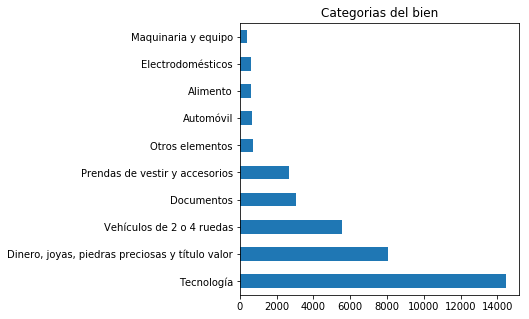

In [6]:
plt.figure(figsize=(5,5))
filtro1['Categoria_Bien'].value_counts().plot(kind='barh', title='Categorias del bien')
plt.show()

Otra de las  variables que  nos interesa conservar es la modalidad, pues esta tipifica el modo en que  ocurrio el hurto

In [7]:
conteo_modalidades=pd.DataFrame(filtro1['Modalidad'].value_counts())
conteo_modalidades.head(10)

,Modalidad
Atraco,14995
Descuido,6921
Cosquilleo,5383
Halado,4018
Raponazo,1644
Rompimiento cerraduta,1464
Engaño,645
Escopolamina,338
Mechero,312
Sin dato,199


Las  modalidades del hurto también  poseen  una  amplia  gama  de  tipologías  siendo el atraco el más común, considerando la  modalidad una  variable  clave para identificar  si el delito corresponde  a hurto a personas  o no, eliminaremos aquellos  casos donde   la modalidad  llega sin información, es decir, eliminaremos 190 registros. 

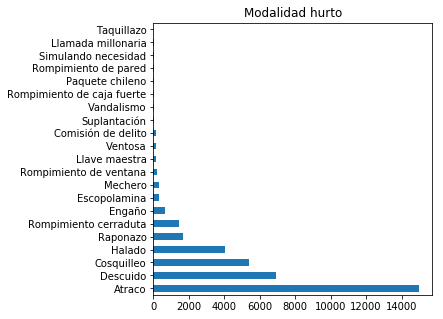

In [8]:
filtro2=filtro1[(filtro1['Modalidad'] != 'Sin dato')]
plt.figure(figsize=(5,5))
filtro2['Modalidad'].value_counts().plot(kind='barh', title='Modalidad hurto')
plt.show()

La edad de  puede  ser considerada un factor  relevante a la  hora de ser victima de una u otra modalidad de  hurto, analizando la edad de las  victimas  encontramos lo  siguiente:

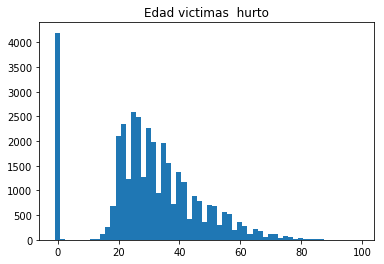

In [9]:
plt.title('Edad victimas  hurto')
plt.hist(filtro2['Edad_Hurto'],bins=60)
plt.show()

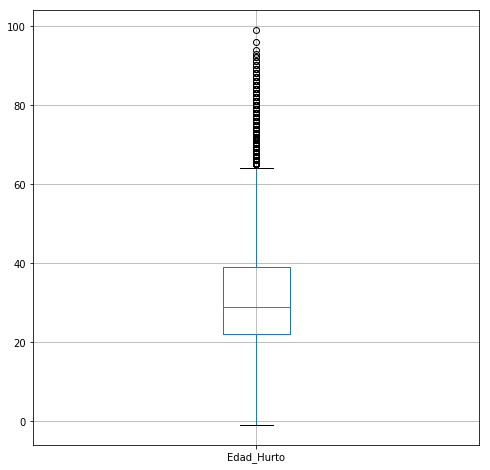

In [10]:
plt.figure(figsize=(8,8))
boxplot = filtro2.boxplot('Edad_Hurto')

Vemos que existen un pico de datos  atípicos  con edades de  -1, las cuales no  pueden  ser consideradas dentro de la  distribución de edad de la  población, si consideramos  como atípicos  todos aquellos casos  inferiores a 19 años y partiendo de la  información suministrada por  el boxplot también consideramos atípicos los hurtos a personas  mayores de 62 años. La distribución  de la edad de la  muestra  tomada para el análisis seria :

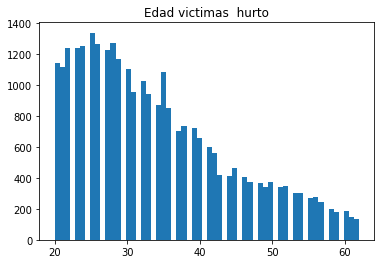

In [11]:
filtro3=filtro2[(filtro2['Edad_Hurto'] >=20 ) & (filtro2['Edad_Hurto'] <=62 )]
plt.title('Edad victimas  hurto')
plt.hist(filtro3['Edad_Hurto'],bins=60)
plt.show()

Revisaremos algunas  otras  variables  que  podrían  tener  algún tipo de  aporte en la discriminación  del tipo de  hurto,  en este caso revisaremos  la información de los días, los meses y las  horas en las que ocurren.

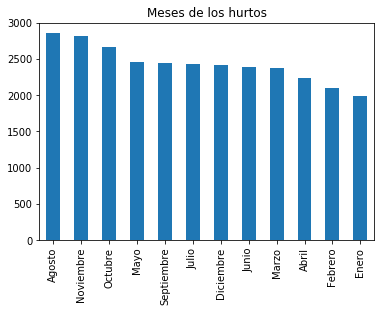

In [12]:
filtro3['Mes_Calendario'].value_counts().plot(kind='bar', title='Meses de los hurtos')
plt.show()

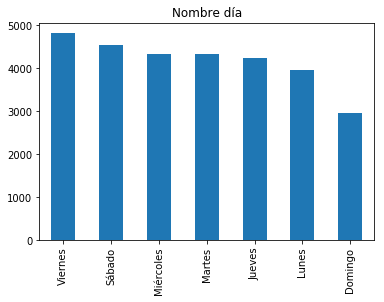

In [13]:
filtro3['Dia_nombre'].value_counts().plot(kind='bar', title='Nombre día')
plt.show()

El mes en que  más  hurtos  se  denuncian  son agosto y noviembre, el primero coincide con el  principal evento de ciudad (la feria de flores) que  atrae anualmente a más  de 15000 turistas los cuales se convierte en blancos  fáciles  para los delincuentes el segundo por  su parte es el mes donde  se  intensifican las  compras  ya que  es el periodo previo a las  fiestas  de  fin de año. Con respecto al día vemos que este tipo de crímenes  se  intensifican los  fines de  semana.

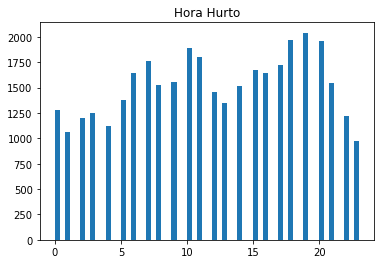

In [14]:
plt.title('Hora Hurto')
plt.hist(filtro2['Hora_Hurto'],bins=60)
plt.show()

Con respecto a la  hora, vemos que existen algunos picos  entre las  6-8  horas en que  las  personas  suelen  salir a trabajar, 11-12  y 17-20  siendo estas  ultimas  las horas donde  mayores picos hay.

Si  con la identificación de los  hurtos lograrán disminuirse los trámites administrativos, seria de utilidad  identificar cuales serían las  sedes que   agilizarían la  atención de  denuncias. 

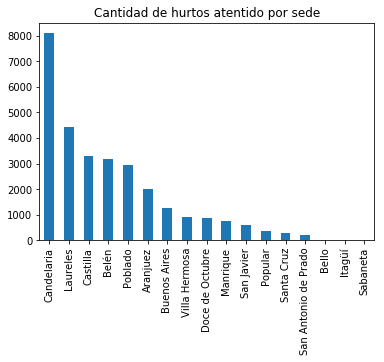

In [15]:
filtro3['Sede_Receptora'].value_counts().plot(kind='bar', title='Cantidad de hurtos atentido por sede')
plt.show()

El CAI que  mayor cantidad de denuncias  atiende es la de la Candelaria  la  cual se  encuentra  ubicada en la  zona centro-oriental de la ciudad, esta zona se caracteriza por  tener  gran cantidad de negocios, centros  históricos  y culturales.

### Creación de nuevas  carácteristicas


Como hemos visto hasta este momento nuestras  variables categóricas tienen unan una amplia cantidad  de subclases, hemos  disminuir algunas  bajo unas  reglas  de conformación del  data set, sin embargo , lo que  buscaremos ahora  reagrupar  las  clases  persistentes con  el objetivo de  tener  la  información de  manera mas  compacta  y manejable.

La tipología del  bien como se puede  ver en la  ilustración 1, aun  poseen una gran desproporción encuanto a los  bienes hurtados, es por esto que  creamos  una nueva variable llamada bien para  recategorizar los  bienes  10 clases de bienes  en  al menos  6 grupos más compactos.

In [16]:
bienes=[]
tecnologia=['Tecnología']
Dinero=['Dinero, joyas, piedras preciosas y título valor']
Documentos=['Documentos']
Vehiculos=['Vehículos de 2 o 4 ruedas','Automóvil']
Ropa=['Prendas de vestir y accesorios']

for i in range(0,len(filtro3)):
    if filtro3['Categoria_Bien'].values.tolist()[i] in tecnologia:
        P='Tecnología'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Dinero:
        P='Dinero'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Documentos:  
        P='Documentos'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Vehiculos: 
        P='Vehiculos'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Ropa:
        P='Ropa'
    else:
        P='Otras'
    bienes.append(P)
filtro3['bienes']=bienes

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


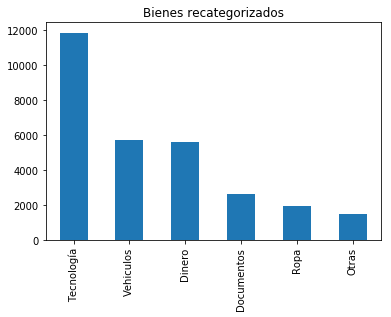

In [17]:
filtro3['bienes'].value_counts().plot(kind='bar', title='Bienes recategorizados')
plt.show()

Partiendo de la  ubicación de cada comuna , conformamos   7 categorías  para recoger las  16 comunas y los corregimientos  que  componen el área metropolitana.

In [18]:
Zona=[]
nororiental=[1,2,3,4]
centroriental=[8,9,10]
suroriental=[14]
noroccidental=[5,6,7]
cetroccidental=[11,12,13]
suroccidental=[15,16]

for i in range(0,len(filtro3)):
    if filtro3['Cod._Comuna'].values.tolist()[i] in nororiental:
        P='Nororiental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in centroriental:
        P='Centroriental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in suroriental:  
        P='Suroriental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in noroccidental: 
        P='Noroccidental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in cetroccidental:
        P='Centroccidental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in suroccidental:
        P='Suroccidental'
    else:
        P='Otras'
    Zona.append(P)
filtro3['Zona']=Zona

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


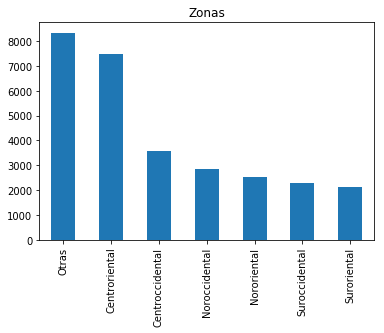

In [19]:
filtro3['Zona'].value_counts().plot(kind='bar', title='Zonas')
plt.show()

Las  modalidades de  hurto son amplias, por lo cual también reagruparemos están  en solo 5 macro tipos de modalidad.
*	Atracos (Por ser la más común)
*	Escopolamina (Por ser única en su clase)
*	Cosquilleó y raponazo (Por  tratarse de ataques a la víctima con fuerza mesurada)
*	Engaño o descuido (Por ser la victima la que  da  pie a la ocurrencia del echo)
*	Otras modalidades.


In [20]:
modalidades=[]
atracos=['Comisión de delito','Atraco']
Escopolamina=['Escopolamina']
Cosquilleo_raponazo=['Cosquilleo','Raponazo']
Engaño_descuido=['Descuido','Engaño','Simulando necesidad','Suplantación','Paquete chileno']

for i in range(0,len(filtro3)):
    if filtro3['Modalidad'].values.tolist()[i] in atracos:
        P='atracos'
    elif filtro3['Modalidad'].values.tolist()[i] in Escopolamina:
        P='Escopolamina'
    elif filtro3['Modalidad'].values.tolist()[i] in Cosquilleo_raponazo:  
        P='Cosquilleo_raponazo'
    elif filtro3['Modalidad'].values.tolist()[i] in Engaño_descuido: 
        P='Engaño_descuido'
    else:
        P='Otras'
    modalidades.append(P)
filtro3['modalidades']=modalidades

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


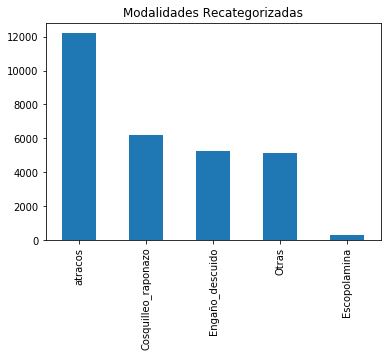

In [21]:
filtro3['modalidades'].value_counts().plot(kind='bar', title='Modalidades Recategorizadas')
plt.show()

El medio en que  se transporte el delincuente  también puede  diferenciar un hurto a personas  por ejemplo de  un hurto a motocicletas  o vehículos, ya que en el primero el delincuente  puede  solo marcharse y desaparecer entre la multitud, pero en el segundo caso este  requiere alcanzar vehículos en algunos casos en movimiento lo que  implica que  su desplazamiento deba hacerse en un medio de  transporte. Teniendo estas  consideraciones, agruparemos los medios de transporte del agresor en  6 tipos:
*	Caminata
*	Motos
*	Transporte publico
*	otros

In [22]:
transporte=[]
caminata=['Caminata']
moto=['Motocicleta','Motocicleta con parrillero']
publico=['Metro','Taxi']
for i in range(0,len(filtro3)):
    if filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in caminata:
        P='caminata'
    elif filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in moto:  
        P='moto'
    elif filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in publico: 
        P='publico'
    else:
        P='Otras'
    transporte.append(P)
filtro3['transporte']=transporte

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


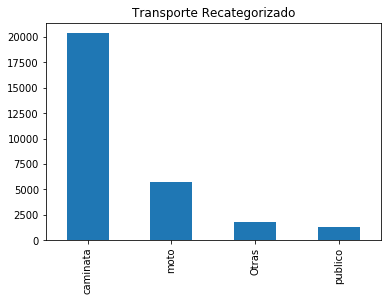

In [23]:
filtro3['transporte'].value_counts().plot(kind='bar', title='Transporte Recategorizado')
plt.show()

El lugar en que se  encuentre  la  victima  también podría  tener una incidencia en determinar  si se  trata de un hurto a personas  o uno a residencia por ejemplo, para ellos también recategorizaremos  los lugares, ya que este  delito puede  ocurrir en cualquier  parte de la ciudad sea un sitio público  o privado.

In [24]:
lugar=[]
comercios=['Económica']
habitacional=['Habitacional']
culturales_deportivos=['Otro','Social','Cultura deportes y recreación']
transporte=['Transporte']
for i in range(0,len(filtro3)):
    if filtro3['Grupo_Lugar'].values.tolist()[i] in comercios:
        P='Comercios'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in habitacional:
        P='Habitacional'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in culturales_deportivos: 
        P='Cultural'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in transporte: 
        P='Transporte'
    else:
        P='Otras'
    lugar.append(P)
filtro3['lugar']=lugar

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


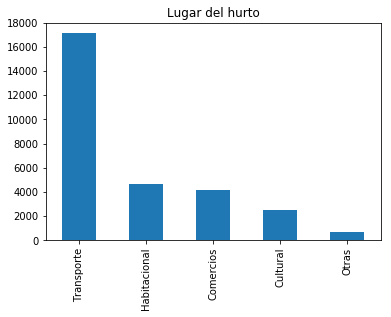

In [25]:
filtro3['lugar'].value_counts().plot(kind='bar', title='Lugar del hurto')
plt.show()

Como vimos anteriormente la variable día  tiene la  fecha completa en la  que  ocurrió el delito, transformaremos  esta  variable y  solo tomaremos el día del hurto, para esto empleamos la función to_datetime de pandas y  extraemos solo  el valor numérico correspondiente al  día.

In [26]:
filtro3["convertido"]=pd.to_datetime(filtro3["Dia"],dayfirst=True)
filtro3["dia"]=filtro3["convertido"].apply(lambda row:row.day)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


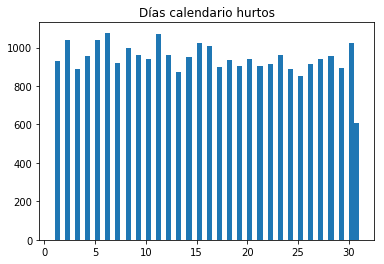

In [27]:
plt.title('Días calendario hurtos')
plt.hist(filtro3['dia'],bins=60)
plt.show()

El arma empleada en los  hurtos puede ayudar a  diferenciar  un hurto a personas  de  las  otras  clases de  hurto, por  esto recategorizamos las armas  en 4 tipos: sin arma, con arma, otros elementos y uso de escopolamina.

In [29]:
arma=[]
armas=['Arma cortopunzante','Arma de fuego']
otros=['Objeto contundente','Llave maestra']
sin_arma=['No']
for i in range(0,len(filtro3)):
    if filtro3['Arma_Medio'].values.tolist()[i] in armas:
        P='armas'
    elif filtro3['Arma_Medio'].values.tolist()[i] in otros:
        P='Otros_elementos'
    elif filtro3['Arma_Medio'].values.tolist()[i] in sin_arma:
        P='Sin_arma'
    else:
        P='Escopolamina'
    arma.append(P)
filtro3['arma']=arma

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


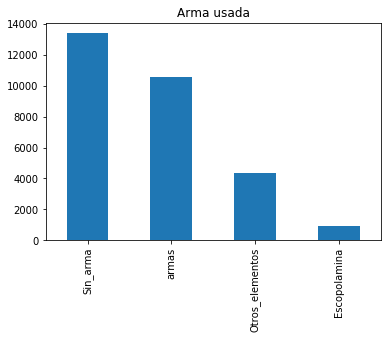

In [30]:
filtro3['arma'].value_counts().plot(kind='bar', title='Arma usada')
plt.show()

Finalmente, crearemos  nuestra  variable  objetivo a clasificar que  será una  variable  binaria  que tomará el valor de 1 si el delito es un hurto a persona  0  si se trata de  otro tipo de hurto.

In [31]:
hurto_persona=[]
hurto=['Hurto a persona']
for i in range(0,len(filtro3)):
    if filtro3['Conducta'].values.tolist()[i] in hurto:
        P=1
    else:
        P=0
    hurto_persona.append(P)
filtro3['hurto_persona']=hurto_persona

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


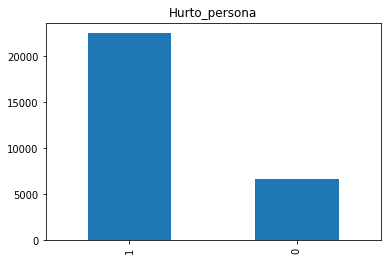

In [32]:
filtro3['hurto_persona'].value_counts().plot(kind='bar', title='Hurto_persona')
plt.show()

Consolidamos la base con las  variables que  nos ayudarán a desarrollar los modelos y analisis posteriores

In [35]:
Med2019=filtro3.drop(['Dia','Jornada','Categoria_Bien', 'Conducta','Modalidad','Grupo_Bien',
                        'Rango_Edad', 'Rango_Edad_Pisc','Grupo_Lugar','Arma_Medio',
                       'Medio_Transporte_Agresor', 'convertido'],axis=1)
Med2019.columns

Index(['Dia_nombre', 'Mes_Calendario', 'Hora_Hurto', 'Bien', 'Sexo',
       'Edad_Hurto', 'Cod._Barrio', 'Barrio', 'Cod._Comuna', 'Comuna',
       'Geo_X_Hurto', 'Geo_Y_Hurto', 'Lugar', 'Valor_Hurto', 'Estado_Civil',
       'Sede_Receptora', 'bienes', 'Zona', 'modalidades', 'transporte',
       'lugar', 'dia', 'arma', 'hurto_persona'],
      dtype='object')

### Selección de carácteristicas
Para iniciar con el proceso de selección de caracteristicas iniciaremos dicotomizando las  variables categoricas que  nos interesa incluir en nuestro modelo

In [37]:
caracteristicas=Med2019.loc[:,['Dia_nombre', 'Mes_Calendario', 'Hora_Hurto','Sexo','Edad_Hurto',
                                'Valor_Hurto', 'Estado_Civil','bienes', 'Zona', 'modalidades',
                               'transporte','lugar', 'dia', 'arma', 'hurto_persona']]
caracteristicas.head(5)

,Dia_nombre,Mes_Calendario,Hora_Hurto,Sexo,Edad_Hurto,Valor_Hurto,Estado_Civil,bienes,Zona,modalidades,transporte,lugar,dia,arma,hurto_persona
0,Martes,Enero,18,Hombre,26,5000000,Soltero(a),Vehiculos,Nororiental,Otras,caminata,Habitacional,1,Otros_elementos,0
1,Martes,Enero,9,Hombre,27,4200000,Soltero(a),Vehiculos,Centroriental,Otras,caminata,Habitacional,1,Otros_elementos,0
2,Martes,Enero,11,Mujer,28,4000000,Soltero(a),Vehiculos,Nororiental,Otras,caminata,Transporte,1,Sin_arma,0
3,Martes,Enero,22,Mujer,46,2500000,Casado(a),Vehiculos,Noroccidental,Otras,caminata,Habitacional,1,Otros_elementos,0
4,Martes,Enero,20,Mujer,39,3500000,Soltero(a),Vehiculos,Centroriental,Otras,caminata,Transporte,1,Otros_elementos,0


In [ ]:
Como tenemos una  variable  binaria un posible  modelo a emplear podria  ser una regresión logistica lo cual nos  permiti

In [38]:
dummies=pd.get_dummies(caracteristicas, columns=['Dia_nombre','Mes_Calendario','Sexo',
                                                 'Estado_Civil','bienes','Zona','modalidades',
                                                 'transporte','lugar','arma'], drop_first=True)
dummies.head(5)

,Hora_Hurto,Edad_Hurto,Valor_Hurto,dia,hurto_persona,Dia_nombre_Jueves,Dia_nombre_Lunes,Dia_nombre_Martes,Dia_nombre_Miércoles,Dia_nombre_Sábado,...,transporte_caminata,transporte_moto,transporte_publico,lugar_Cultural,lugar_Habitacional,lugar_Otras,lugar_Transporte,arma_Otros_elementos,arma_Sin_arma,arma_armas
0,18,26,5000000,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,9,27,4200000,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,11,28,4000000,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
3,22,46,2500000,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,20,39,3500000,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0


In [39]:
x=dummies.drop(['hurto_persona'],axis=1)
y= dummies.loc[:,['hurto_persona']]

# Forward

El algoritmo de selección hacia adelante, comienza con un modelo nulo al cual va ingresando una a una las  variables  explicativas, la característica con el valor p mínimo es Seleccionada. Ahora ajuste un modelo con dos funciones probando combinaciones de la función seleccionada anteriormente con todas las demás funciones Repita este proceso hasta que tengamos un conjunto de características seleccionadas con un valor p de característica individual menor que el nivel de significancia.

In [40]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [41]:
forward_selection(x,y)

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.532827
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534438
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536344
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.523975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.537111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.537125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.447380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.520909
  

Optimization terminated successfully.
         Current function value: 0.445305
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244979
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.442526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.446863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.443391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447346
  

Optimization terminated successfully.
         Current function value: 0.265700
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239785
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267410
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266020
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267702
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267734
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.263105
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267434
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267639
  

Optimization terminated successfully.
         Current function value: 0.133811
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133820
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.130923
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133804
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133791
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133826
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133833
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133784
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.133833
  

Optimization terminated successfully.
         Current function value: 0.124012
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.120458
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.123906
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124094
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.120169
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.120296
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.120448
  

Optimization terminated successfully.
         Current function value: 0.117928
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117940
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117384
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.117933
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.116141
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117901
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117896
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117873
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117938
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.117942
 

Optimization terminated successfully.
         Current function value: 0.114828
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114827
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114823
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114773
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114783
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114777
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114822
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114829
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.111968
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111963
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111927
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111967
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111967
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111911
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111884
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111920
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111960
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.110902
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110915
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110957
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110977
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110968
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110656
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110950
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.110508
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110450
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.109990
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109935
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110093
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110111
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110080
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110102
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110092
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110050
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.110081
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.109547
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109629
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109733
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109715
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109694
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109712
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109725
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109733
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109719
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.109376
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.109336
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109331
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109296
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109326
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109311
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109285
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109309
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.109336
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

['bienes_Tecnología',
 'modalidades_Otras',
 'lugar_Habitacional',
 'bienes_Vehiculos',
 'arma_Sin_arma',
 'arma_armas',
 'modalidades_Engaño_descuido',
 'lugar_Transporte',
 'arma_Otros_elementos',
 'modalidades_atracos',
 'Valor_Hurto',
 'bienes_Documentos',
 'Zona_Noroccidental',
 'Zona_Nororiental',
 'Sexo_Mujer',
 'lugar_Cultural',
 'bienes_Otras',
 'transporte_moto',
 'Estado_Civil_Unión marital de hecho',
 'transporte_caminata',
 'Zona_Suroriental',
 'Hora_Hurto']

In [62]:
x_forward=x.loc[:,['bienes_Tecnología','modalidades_Otras','lugar_Habitacional','bienes_Vehiculos',
          'arma_Sin_arma','arma_armas','modalidades_Engaño_descuido','lugar_Transporte',
          'arma_Otros_elementos','modalidades_atracos','Valor_Hurto','bienes_Documentos',
           'Zona_Noroccidental','Zona_Nororiental','Sexo_Mujer','lugar_Cultural','bienes_Otras',
            'transporte_moto','Estado_Civil_Unión marital de hecho','transporte_caminata',
            'Zona_Suroriental',
'Hora_Hurto']]
logit_forward = sm.Logit(y,x_forward, maxiter=35 )
result = logit_forward .fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.115458
         Iterations 10
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.785    
Dependent Variable:         hurto_persona          AIC:                    6781.4533
Date:                       2020-03-12 13:59       BIC:                    6963.6383
No. Observations:           29177                  Log-Likelihood:         -3368.7  
Df Model:                   21                     LL-Null:                -15672.  
Df Residuals:               29155                  LLR p-value:            0.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             10.0000                                                 
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.97

# Backward

Este método inicia teniendo en cuenta todas las características  iterando sobre los valores de significancia (Valor P) eliminando la característica menos significativa en cada iteración, buscando obtener un mejor rendimiento del modelo. Este proceso es repetido hasta que la eliminación de características no represente una mejora para el modelo

In [44]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.Logit(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [45]:
backward_elimination(x,y)

Optimization terminated successfully.
         Current function value: 0.108421
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108422
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108423
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108424
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108426
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108428
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108432
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108437
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.108445
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

['Hora_Hurto',
 'Valor_Hurto',
 'Mes_Calendario_Agosto',
 'Sexo_Mujer',
 'Estado_Civil_Unión marital de hecho',
 'bienes_Documentos',
 'bienes_Otras',
 'bienes_Tecnología',
 'bienes_Vehiculos',
 'Zona_Centroriental',
 'Zona_Noroccidental',
 'Zona_Nororiental',
 'Zona_Otras',
 'modalidades_Engaño_descuido',
 'modalidades_Otras',
 'modalidades_atracos',
 'transporte_caminata',
 'transporte_moto',
 'lugar_Cultural',
 'lugar_Habitacional',
 'lugar_Transporte',
 'arma_Otros_elementos',
 'arma_Sin_arma',
 'arma_armas']

In [61]:
x_backward=x.loc[:,['Hora_Hurto','Valor_Hurto','Mes_Calendario_Agosto','Sexo_Mujer','Estado_Civil_Unión marital de hecho',
                     'bienes_Documentos','bienes_Otras','bienes_Tecnología','bienes_Vehiculos','Zona_Centroriental',
                     'Zona_Noroccidental','Zona_Nororiental','Zona_Otras','modalidades_Engaño_descuido','modalidades_Otras',
                     'modalidades_atracos','transporte_caminata','transporte_moto','lugar_Cultural','lugar_Habitacional',
                     'lugar_Transporte','arma_Otros_elementos','arma_Sin_arma','arma_armas']]
logit_forward = sm.Logit(y,x_backward )
result = logit_forward .fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.115624
         Iterations 9
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.785    
Dependent Variable:         hurto_persona          AIC:                    6795.1161
Date:                       2020-03-12 13:57       BIC:                    6993.8633
No. Observations:           29177                  Log-Likelihood:         -3373.6  
Df Model:                   23                     LL-Null:                -15672.  
Df Residuals:               29153                  LLR p-value:            0.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             9.0000                                                  
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975

In [47]:
np.random.seed(seed = 42) # Semilla para la  selección de la muestra
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
rf = RandomForestClassifier(n_estimators = 500, #numero de arboles
                            criterion='gini', #función para medir la calidad de la división
                            max_depth=None, # Profundidad
                            n_jobs = -1, #Trabajos  ejecutados en paralelo
                            random_state = 42  #Inicio de la muestra 
                           )
                            
classifier=rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.score(X_valid, y_valid)))

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 Training Score: 1.00 
R^2 Validation Score: 0.97


In [54]:
headers = x.columns.values.tolist()

In [55]:
predictions=classifier.predict(X_valid)
sklearn.metrics.confusion_matrix(y_valid,predictions)

array([[1255,   93],
       [  91, 4397]], dtype=int64)

In [53]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.accuracy_score(y_valid,predictions)

0.9684715558601782

In [57]:
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':rf.feature_importances_.tolist()
 })

In [58]:
print(var_imp.sort_values(by='v_importance', ascending=False))

                                feature  v_importance
31                     bienes_Vehiculos      0.289481
2                           Valor_Hurto      0.148361
40                    modalidades_Otras      0.113054
46                   lugar_Habitacional      0.098031
49                 arma_Otros_elementos      0.067254
30                    bienes_Tecnología      0.040799
50                        arma_Sin_arma      0.028500
0                            Hora_Hurto      0.022914
1                            Edad_Hurto      0.020077
3                                   dia      0.017632
41                  modalidades_atracos      0.014548
48                     lugar_Transporte      0.013000
51                           arma_armas      0.009619
38          modalidades_Engaño_descuido      0.007962
27                    bienes_Documentos      0.006775
42                  transporte_caminata      0.006188
21                           Sexo_Mujer      0.006112
45                       lug